# <b> Overview <b>




Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch. Here we will create a machine learning model to predict if the first stage will land or not.

# Tools

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, RocCurveDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [207]:
!git clone https://github.com/ZahraSahranavard/SpaceX-ML.git

fatal: destination path 'SpaceX-ML' already exists and is not an empty directory.


# Load Dataset


In [208]:
df = pd.read_csv('SpaceX-ML/dataset.csv')
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

# Pre-processing

In [210]:
null_values = df.isnull().sum()
print(null_values)

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
Class              0
dtype: int64


In [211]:
df['LaunchSite']

,LaunchSite
0,CCAFS SLC 40
1,CCAFS SLC 40
2,CCAFS SLC 40
3,VAFB SLC 4E
4,CCAFS SLC 40
...,...
85,KSC LC 39A
86,KSC LC 39A
87,KSC LC 39A
88,CCAFS SLC 40


In [212]:
set(df['LaunchSite'])

{'CCAFS SLC 40', 'KSC LC 39A', 'VAFB SLC 4E'}

In [213]:
df_dummy= pd.get_dummies(df[['Orbit','LaunchSite','Outcome','LandingPad','Serial']]).astype(int)
df_dummy

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
86,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
87,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
88,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [214]:
df['GridFins']=df['GridFins'].astype(int)
df['Reused']=df['Reused'].astype(int)
df['Legs']=df['Legs'].astype(int)

In [215]:
df = df.drop(['Orbit','LaunchSite','Outcome','LandingPad','Serial'],axis=1)
df = pd.concat([df, df_dummy], axis=1)

In [216]:
df = df.drop(['FlightNumber', 'Date', 'BoosterVersion'], axis=1)

In [217]:
df

,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,Class,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,6104.959412,1,0,0,0,1.0,0,-80.577366,28.561857,0,...,0,0,0,0,0,0,0,0,0,0
1,525.000000,1,0,0,0,1.0,0,-80.577366,28.561857,0,...,0,0,0,0,0,0,0,0,0,0
2,677.000000,1,0,0,0,1.0,0,-80.577366,28.561857,0,...,0,0,0,0,0,0,0,0,0,0
3,500.000000,1,0,0,0,1.0,0,-120.610829,34.632093,0,...,0,0,0,0,0,0,0,0,0,0
4,3170.000000,1,0,0,0,1.0,0,-80.577366,28.561857,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,15400.000000,2,1,1,1,5.0,2,-80.603956,28.608058,1,...,0,0,0,0,0,0,0,0,1,0
86,15400.000000,3,1,1,1,5.0,2,-80.603956,28.608058,1,...,0,0,0,0,0,0,1,0,0,0
87,15400.000000,6,1,1,1,5.0,5,-80.603956,28.608058,1,...,0,0,0,1,0,0,0,0,0,0
88,15400.000000,3,1,1,1,5.0,2,-80.577366,28.561857,1,...,0,0,0,0,0,0,0,0,1,0


In [218]:
df.to_csv('preprocessed_dataset.csv')

In [219]:
df.to_csv('preprocessed_dataset.csv', index=False)
# files.download('preprocessed_dataset.csv')

In [220]:
Preprocessed = pd.read_csv('preprocessed_dataset.csv')
Preprocessed.head()

,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,Class,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,6104.959412,1,0,0,0,1.0,0,-80.577366,28.561857,0,...,0,0,0,0,0,0,0,0,0,0
1,525.000000,1,0,0,0,1.0,0,-80.577366,28.561857,0,...,0,0,0,0,0,0,0,0,0,0
2,677.000000,1,0,0,0,1.0,0,-80.577366,28.561857,0,...,0,0,0,0,0,0,0,0,0,0
3,500.000000,1,0,0,0,1.0,0,-120.610829,34.632093,0,...,0,0,0,0,0,0,0,0,0,0
4,3170.000000,1,0,0,0,1.0,0,-80.577366,28.561857,0,...,0,0,0,0,0,0,0,0,0,0


In [221]:
Preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 90 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   PayloadMass                          90 non-null     float64
 1   Flights                              90 non-null     int64  
 2   GridFins                             90 non-null     int64  
 3   Reused                               90 non-null     int64  
 4   Legs                                 90 non-null     int64  
 5   Block                                90 non-null     float64
 6   ReusedCount                          90 non-null     int64  
 7   Longitude                            90 non-null     float64
 8   Latitude                             90 non-null     float64
 9   Class                                90 non-null     int64  
 10  Orbit_ES-L1                          90 non-null     int64  
 11  Orbit_GEO                         

In [222]:
x = Preprocessed.drop("Class", axis=1)
y = Preprocessed["Class"]

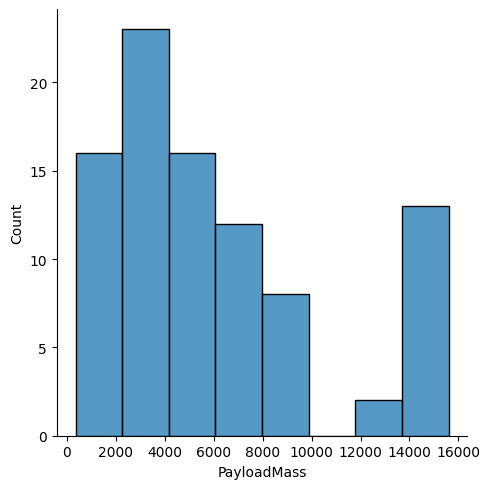

In [223]:
sns.displot(data=x, x="PayloadMass")

# Standardize Features

In [224]:
transform = preprocessing.StandardScaler()
x_scaled = transform.fit_transform(x)
x_scaled

array([[-1.94814463e-16, -6.53912840e-01, -1.87082869e+00, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [-1.19523159e+00, -6.53912840e-01, -1.87082869e+00, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [-1.16267307e+00, -6.53912840e-01, -1.87082869e+00, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       ...,
       [ 1.99100483e+00,  3.49060516e+00,  5.34522484e-01, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [ 1.99100483e+00,  1.00389436e+00,  5.34522484e-01, ...,
        -2.15665546e-01,  5.38516481e+00, -1.05999788e-01],
       [-5.19213966e-01, -6.53912840e-01,  5.34522484e-01, ...,
        -2.15665546e-01, -1.85695338e-01,  9.43398113e+00]])

In [225]:
col=x.columns
x = pd.DataFrame(x_scaled, columns=col)
x

,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,Orbit_ES-L1,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,-1.948145e-16,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,0.411430,-0.417073,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
1,-1.195232e+00,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,0.411430,-0.417073,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
2,-1.162673e+00,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,0.411430,-0.417073,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
3,-1.200587e+00,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-2.433736,2.433637,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
4,-6.286706e-01,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,0.411430,-0.417073,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1.991005e+00,0.174991,0.534522,1.196843,0.517306,0.945537,0.202528,0.409541,-0.395376,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,5.385165,-0.106000
86,1.991005e+00,1.003894,0.534522,1.196843,0.517306,0.945537,0.202528,0.409541,-0.395376,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,5.385165,-0.215666,-0.185695,-0.106000
87,1.991005e+00,3.490605,0.534522,1.196843,0.517306,0.945537,1.966480,0.409541,-0.395376,-0.106,...,-0.215666,-0.267261,-0.106,4.123106,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
88,1.991005e+00,1.003894,0.534522,1.196843,0.517306,0.945537,0.202528,0.411430,-0.417073,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,5.385165,-0.106000


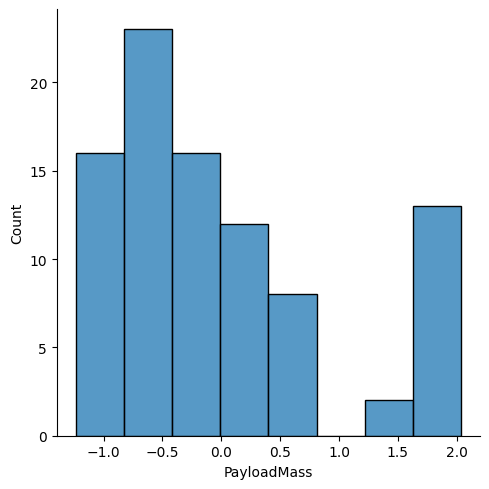

In [226]:
sns.displot(data=x, x="PayloadMass")

# Train-Test Split

In [227]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

# Calculate metrics



In [228]:
def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
  acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
  acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)

  p = precision_score(y_true=y_test, y_pred=y_pred_test)
  r = recall_score(y_true=y_test, y_pred=y_pred_test)

  print(f'acc train: {acc_train} - acc test: {acc_test} - precision: {p} - recall: {r}')

  return acc_train, acc_test, p, r

# Confusion Matrix

In [229]:
def plot_confusion_matrix(y,y_predict):
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

# <b> Classification <b>

# Logistic Regression

In [230]:
lr=LogisticRegression()
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}
logreg_cv = GridSearchCV(lr, parameters,cv=4)
logreg_cv.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [231]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.875


In [232]:
y_pred_train = logreg_cv.predict(x_train)
y_pred_test = logreg_cv.predict(x_test)

acc_train_lr, acc_test_lr, p_lr, r_lr = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 1.0 - acc test: 0.8888888888888888 - precision: 0.8421052631578947 - recall: 1.0


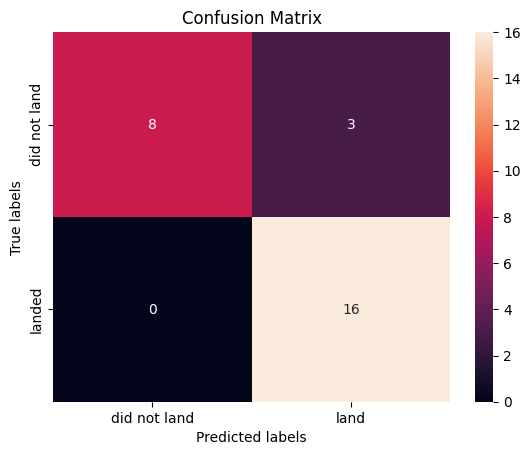

In [233]:
yhat=logreg_cv.predict(x_test)
plot_confusion_matrix(y_test,yhat)

# SVM

In [234]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': (0.5, 1, 1.5)}
svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv = 10)
svm_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': (0.5, 1, 1.5),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [235]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'kernel': 'sigmoid'}
accuracy : 0.9380952380952381


In [236]:
y_pred_train = svm_cv.predict(x_train)
y_pred_test = svm_cv.predict(x_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9841269841269841 - acc test: 0.8888888888888888 - precision: 0.8421052631578947 - recall: 1.0


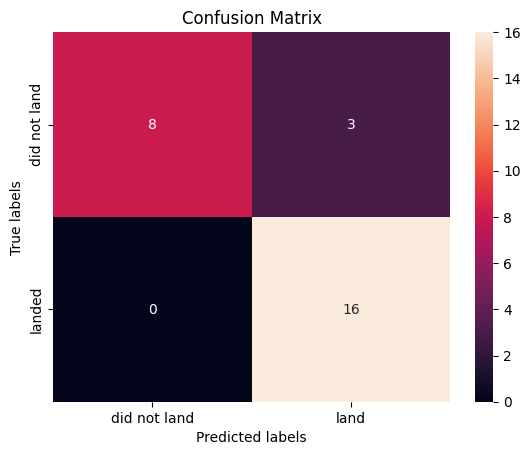

In [237]:
yhat = svm_cv.predict(x_test)
plot_confusion_matrix(y_test,yhat)

# Decision Tree

In [238]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

dt = DecisionTreeClassifier()
dt_cv = GridSearchCV(dt, parameters, cv = 10)


In [239]:
%%capture
dt_cv.fit(x_train, y_train)

In [240]:
print("tuned hpyerparameters :(best parameters) ",dt_cv.best_params_)
print("accuracy :",dt_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.9547619047619047


In [241]:
y_pred_train = dt_cv.predict(x_train)
y_pred_test = dt_cv.predict(x_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 1.0 - acc test: 0.8888888888888888 - precision: 1.0 - recall: 0.8125


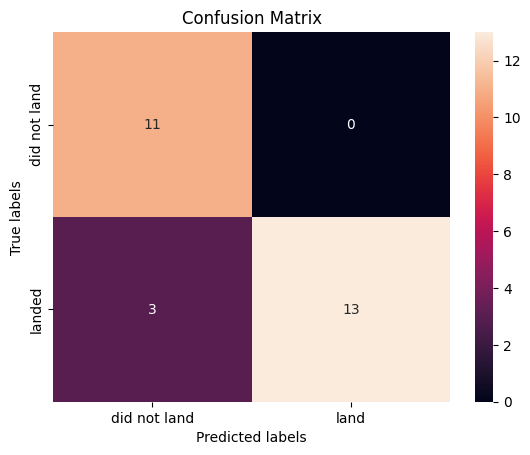

In [242]:
yhat = dt_cv.predict(x_test)
plot_confusion_matrix(y_test,yhat)

# KNN

In [243]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, parameters, cv = 10)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [244]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}
accuracy : 0.8928571428571429


In [245]:
y_pred_train = knn_cv.predict(x_train)
y_pred_test = knn_cv.predict(x_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.8571428571428571 - acc test: 0.8148148148148148 - precision: 0.7619047619047619 - recall: 1.0


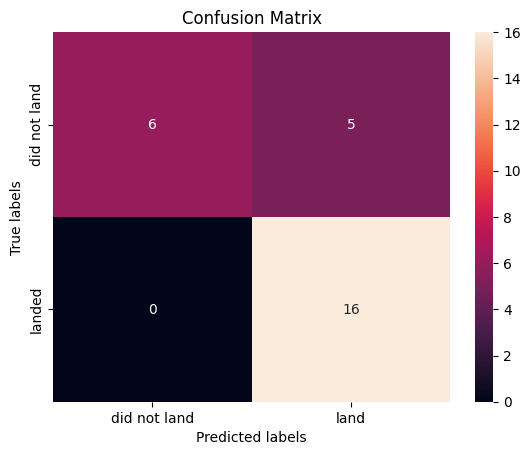

In [246]:
yhat = knn_cv.predict(x_test)
plot_confusion_matrix(y_test,yhat)

# Comparison

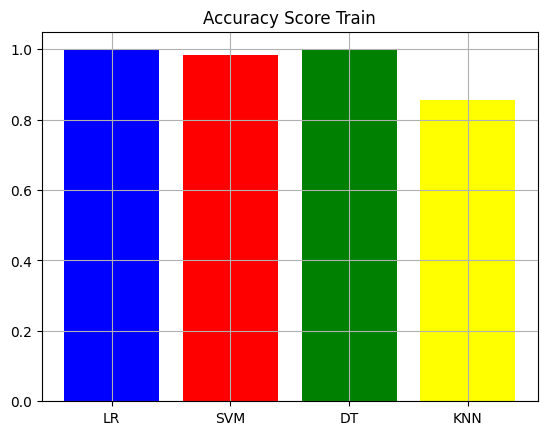

In [247]:
acc_train = [acc_train_lr, acc_train_svm, acc_train_dt, acc_train_knn]
title = ["LR", "SVM", "DT", "KNN"]
colors = ["blue", "red", "green", "yellow"]

plt.title('Accuracy Score Train')
plt.bar(title, acc_train, color=colors)
plt.grid()
plt.show()

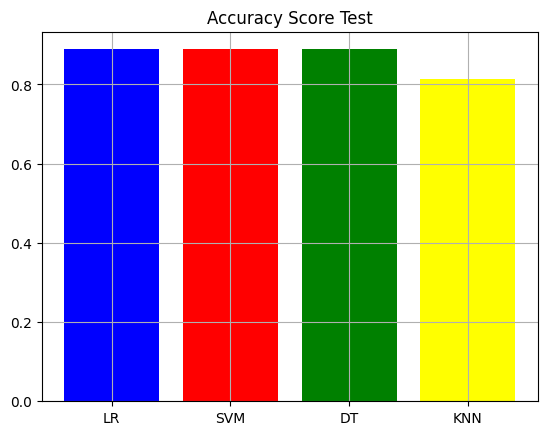

In [248]:
acc_test = [acc_test_lr, acc_test_svm, acc_test_dt, acc_test_knn]
title = ["LR", "SVM", "DT", "KNN"]
colors = ["blue", "red", "green", "yellow"]

plt.title('Accuracy Score Test')
plt.bar(title, acc_test, color=colors)
plt.grid()
plt.show()

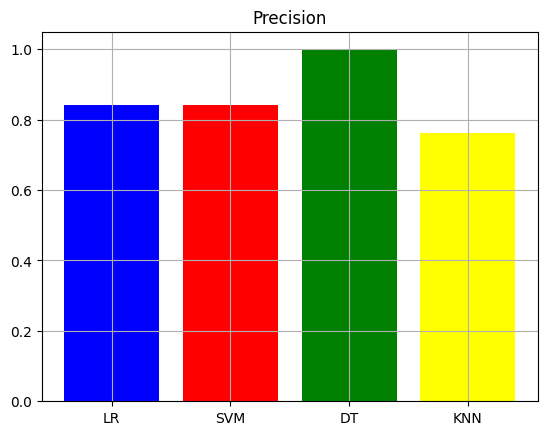

In [249]:
p = [p_lr, p_svm, p_dt, p_knn]
title = ["LR", "SVM", "DT", "KNN"]
colors = ["blue", "red", "green", "yellow"]

plt.title('Precision')
plt.bar(title, p, color=colors)
plt.grid()
plt.show()

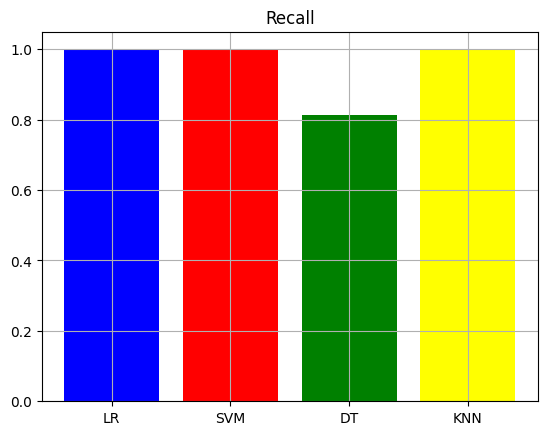

In [250]:
r = [r_lr, r_svm, r_dt, r_knn]
title = ["LR", "SVM", "DT", "KNN"]
colors = ["blue", "red", "green", "yellow"]

plt.title('Recall')
plt.bar(title, r, color=colors)
plt.grid()
plt.show()

# ROC Curve

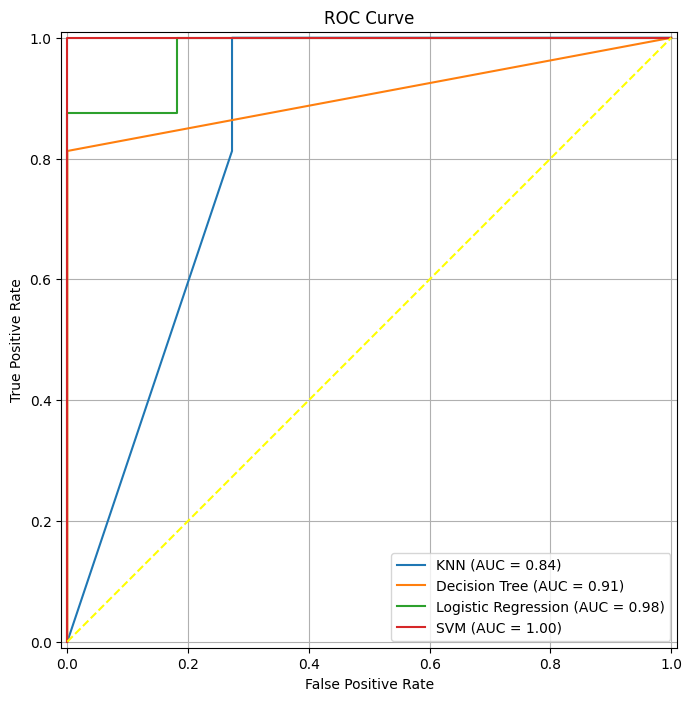

In [251]:
plt.figure(figsize=(10, 8))

RocCurveDisplay.from_estimator(knn_cv, x_test, y_test, name="KNN", ax=plt.gca())
RocCurveDisplay.from_estimator(dt_cv, x_test, y_test, name="Decision Tree", ax=plt.gca())
RocCurveDisplay.from_estimator(logreg_cv, x_test, y_test, name="Logistic Regression", ax=plt.gca())
RocCurveDisplay.from_estimator(svm_cv, x_test, y_test, name="SVM", ax=plt.gca())

plt.plot([0, 1], [0, 1], linestyle='--', color='yellow')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid()
plt.show()
